In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from project_utils import utils
from project_utils import read_utils as read
from project_utils import fig_utils as figu

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
figu.set_plt_rc_params()

In [4]:
input_length = [12, 12, 12, 60]
orig_dates = utils.load_dates(dataset="ERSSTv5")
lats, lons = utils.load_lat_lon()
na_lats = np.array([lats[0:5], lats[-5:]]).reshape(-1)

from project_utils.variant_dict import VARIANT_DICT, test_index

In [5]:
model_list=["ACCESS-ESM1-5", "CanESM5", "CNRM-CM6-1", "GISS-E2-1-G", 
            "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-LR", "NorCPM1"]
leads = [0, 0, 24]
prediction_lengths = [36, 60, 60]
seeds = [101, 121, 505]

### Accuracy on GCM test data

In [6]:
panel_labels = ["a) ", "b) ", "c) ", "d) ", "e) ", "f) ", "g) ", "h) ", "i) "]

In [7]:
def plot_accuracy_by_model(MODEL):
    label_count = 0
    fig = plt.figure(figsize = (7.4, 5))

    for i, (lead, length) in enumerate(zip(leads, prediction_lengths)):
        ax = fig.add_axes([.05, (2-(i % 3))*.29 + 0.06, 0.3, 0.32], projection = ccrs.Robinson(central_longitude = 260))
        acc_ds = xr.open_dataset("../processed_data/accuracy/GCM_accuracy_"+MODEL+"_"+str(length)+"mo_"+str(lead)+"lead.nc")
        ax.set_title(panel_labels[label_count]+"all predictions: ")
        label_count+=1
        p = figu.plot_map(acc_ds.score.mean(dim = ["variant"]), lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
        #figu.add_regions(ax)

        ax = fig.add_axes([.32 + .05, (2-(i % 3))*.29 + 0.06, 0.3, 0.32], projection = ccrs.Robinson(central_longitude = 260))
        ax.set_title(panel_labels[label_count]+"40% most confident predictions: ")
        label_count+=1
        acc_ds = xr.open_dataset("../processed_data/accuracy/GCM_accuracy_top40_"+MODEL+"_"+str(length)+"mo_"+str(lead)+"lead.nc")
        p = figu.plot_map(acc_ds.score.mean(dim = ["variant"]), lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
        #figu.add_regions(ax)

        ax = fig.add_axes([2*.32 + .05, (2-(i % 3))*.29 + 0.06, 0.3, 0.32], projection = ccrs.Robinson(central_longitude = 260))
        ax.set_title(panel_labels[label_count]+"20% most confident predictions: ")
        label_count+=1
        acc_ds = xr.open_dataset("../processed_data/accuracy/GCM_accuracy_top20_"+MODEL+"_"+str(length)+"mo_"+str(lead)+"lead.nc")
        p = figu.plot_map(acc_ds.score.mean(dim = ["variant"]), lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
        figu.add_regions(ax)

    plt.suptitle("Accuracy of CNN trained and tested on "+MODEL+" simulations", y = 0.99, x = 0.03, size = 9, ha = "left", weight = "bold")
    ax.text(s = "year 1-3", x = 0.015, y = 0.765, transform = fig.transFigure, size = 9, rotation = "vertical", weight = "bold", color = "darkblue")
    ax.text(s = "year 1-5", x = 0.015, y = 0.465, transform = fig.transFigure, size = 9, rotation = "vertical", weight = "bold", color = "darkblue")
    ax.text(s = "year 3-7", x = 0.015, y = 0.165, transform = fig.transFigure, size = 9, rotation = "vertical", weight = "bold", color = "darkblue")

    cbaxes = fig.add_axes([.095, 0.07, 0.2, 0.015]) 
    cbar = fig.colorbar(p, cax = cbaxes, label = 'prediction accuracy', orientation = "horizontal")
    cbar.ax.tick_params(labelsize=7)

    cbaxes = fig.add_axes([.32 + .095, 0.07, 0.2, 0.015]) 
    cbar = fig.colorbar(p, cax = cbaxes, label = 'prediction accuracy', orientation = "horizontal")
    cbar.ax.tick_params(labelsize=7)

    cbaxes = fig.add_axes([2*.32 + .095, 0.07, 0.2, 0.015]) 
    cbar = fig.colorbar(p, cax = cbaxes, label = 'prediction accuracy', orientation = "horizontal")
    cbar.ax.tick_params(labelsize=7)

    plt.savefig("../figures/Fig_"+MODEL+"_accuracy_maps.pdf")

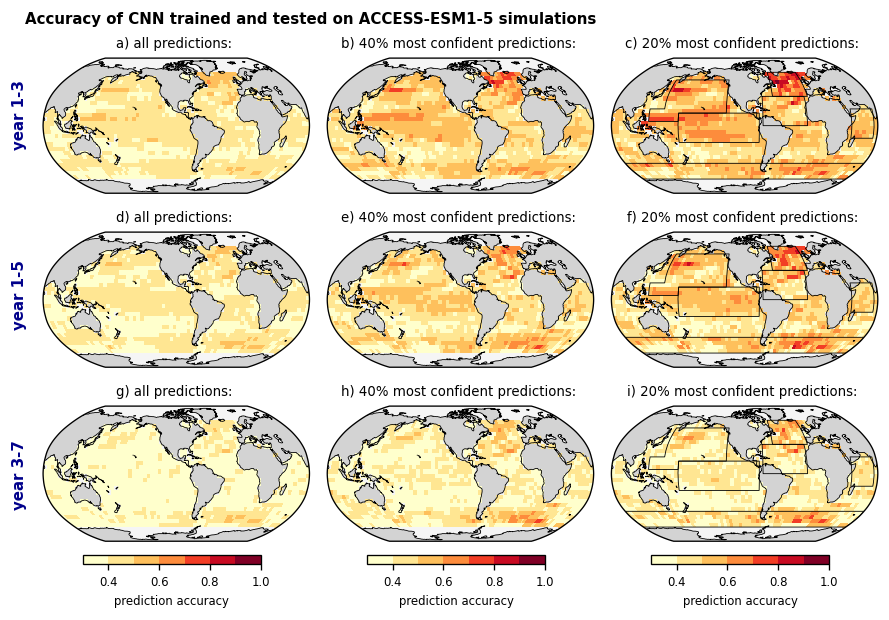

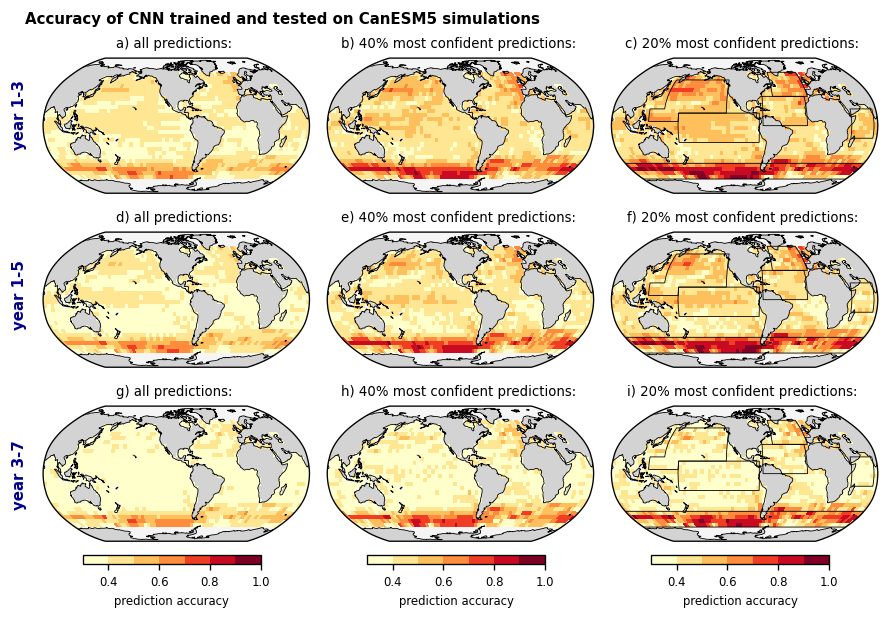

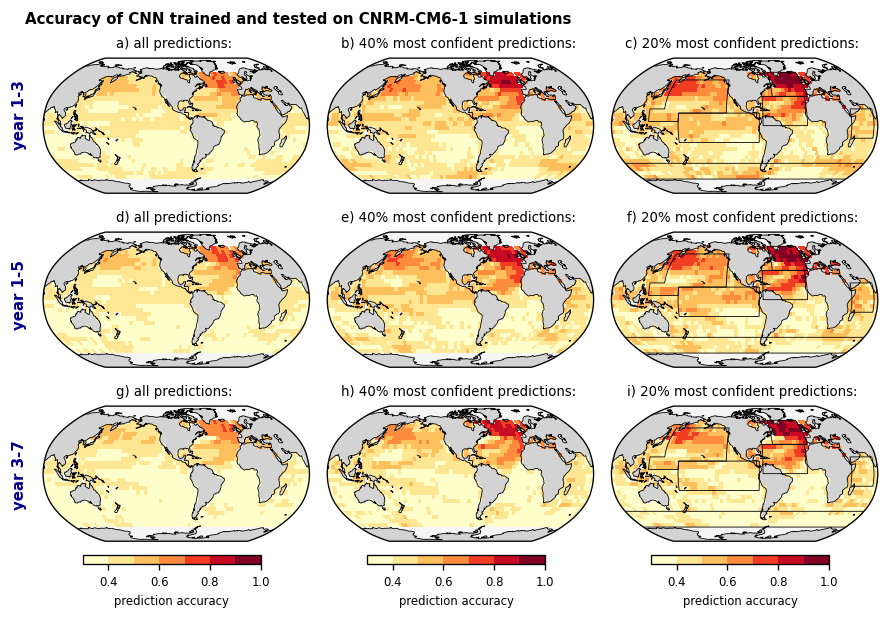

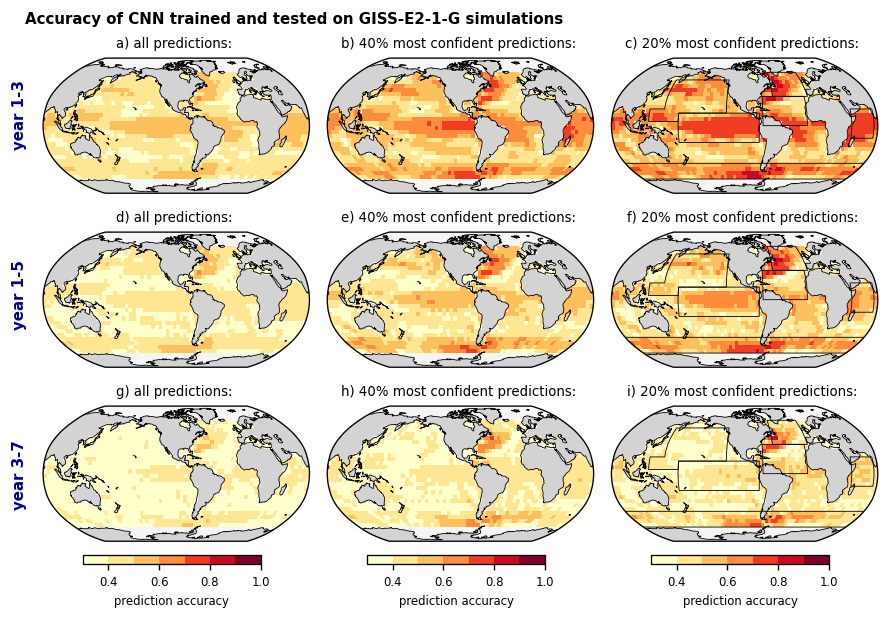

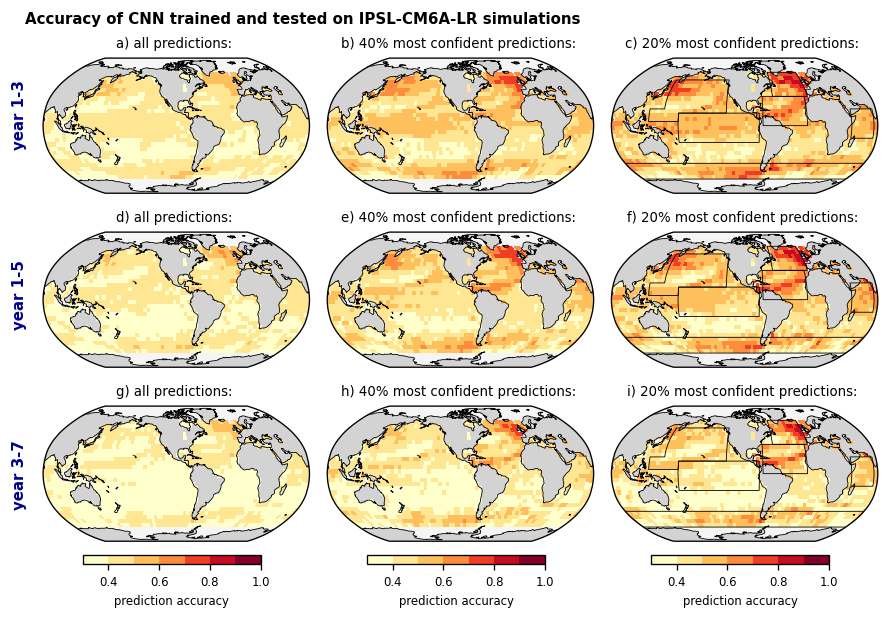

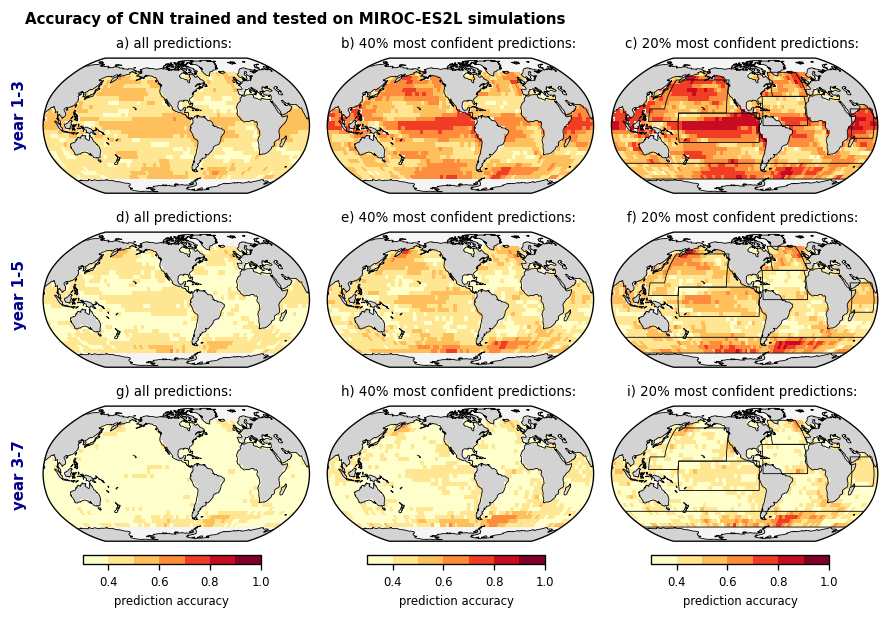

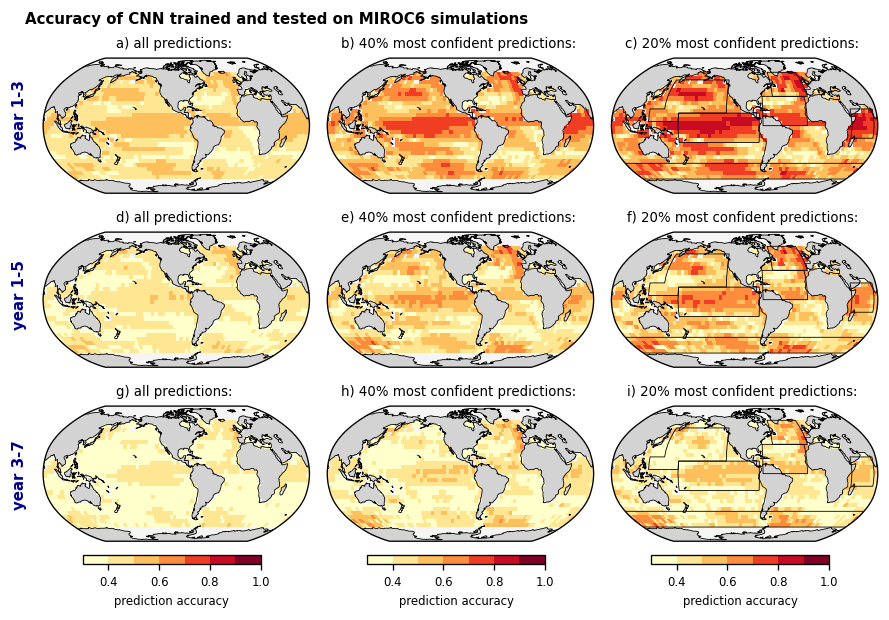

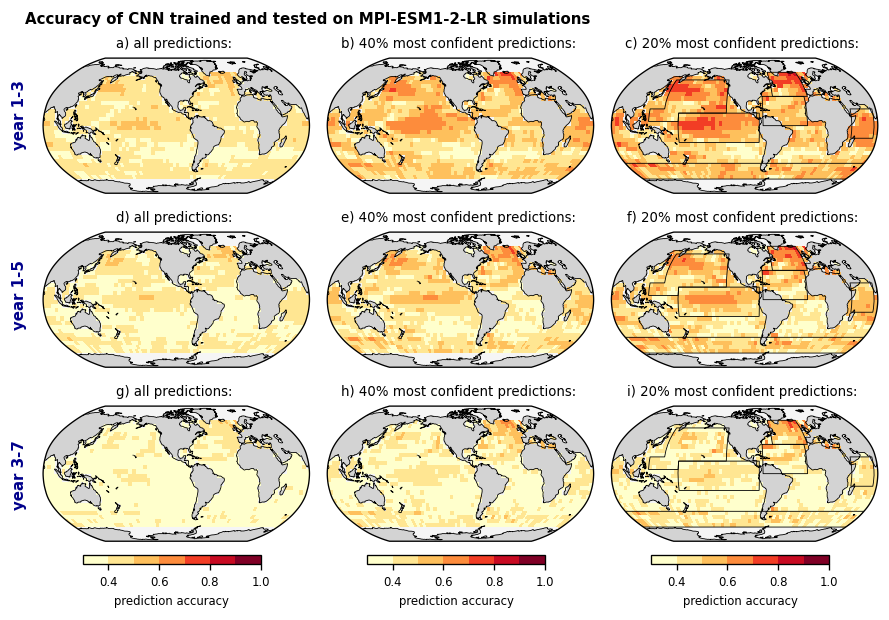

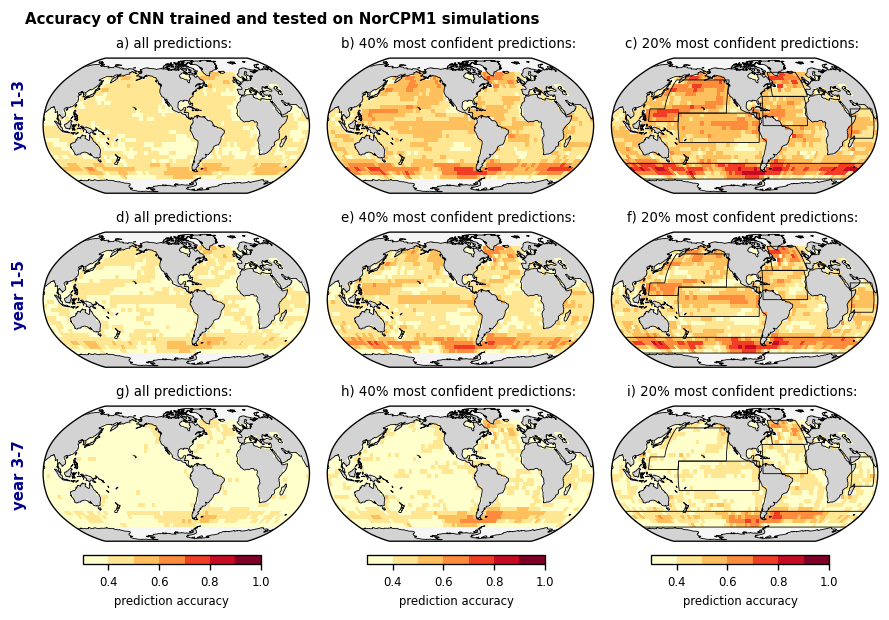

In [8]:
for MODEL in model_list:
    plot_accuracy_by_model(MODEL)

### Accuracy on OBS, top 20%

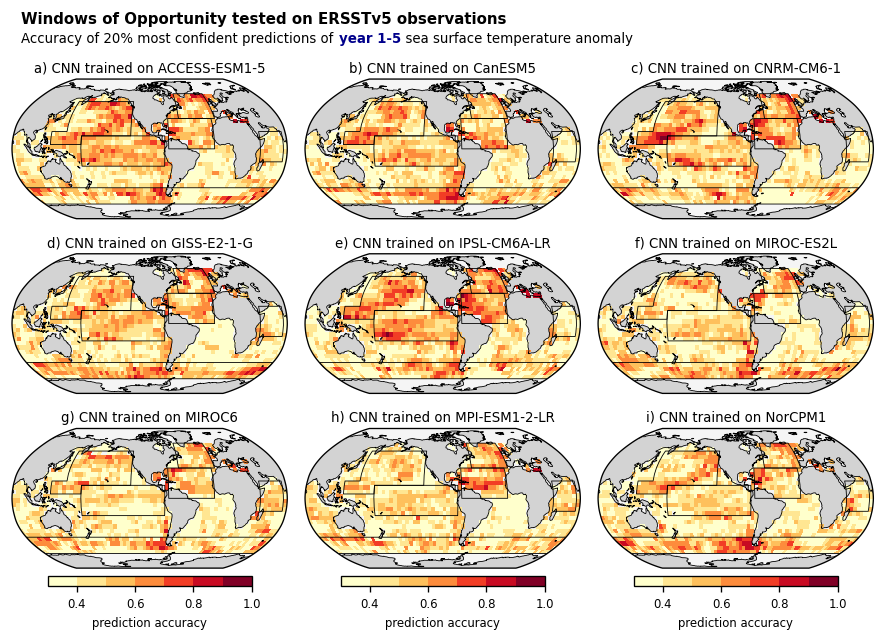

In [9]:
lead = 0
length = 60

fig = plt.figure(figsize = (7.4, 5.2))
label_count=0
for i, MODEL in enumerate(model_list):
    acc_ds = xr.open_dataset("../processed_data/accuracy/ERSSTv5_accuracy_top20_"+MODEL+\
                          "_"+str(length)+"mo_"+str(lead)+"lead.nc")
    ax = fig.add_axes([(i % 3)*.33 + .02, (2-(i // 3))*.28 + 0.06, 0.31, 0.3], projection = ccrs.Robinson(central_longitude = 260))
    ax.set_title(panel_labels[label_count]+"CNN trained on "+MODEL, 
                         y = 1.05, transform = ax.transAxes)
    label_count+=1

    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
    figu.add_regions(ax)

    if i >=6: 
        cbaxes = fig.add_axes([(i % 3)*.33 + .06, 0.07, 0.23, 0.015]) 
        cbar = fig.colorbar(p, cax = cbaxes, label = 'prediction accuracy', orientation = "horizontal")
        cbar.ax.tick_params(labelsize=7)

plt.suptitle("Windows of Opportunity tested on ERSSTv5 observations", y = 0.99, x = 0.03, size = 9, ha = "left", weight = "bold")
ax.text(s = "Accuracy of 20% most confident predictions of                 sea surface temperature anomaly", x = 0.03, y = 0.94, 
             transform = fig.transFigure, size = 8)
ax.text(s = "year 1-5", y = 0.94, x = 0.388, color = "darkblue", weight = "bold",  
             transform = fig.transFigure, size = 8)

plt.savefig("../figures/Fig3_top20_accuracy_ERSSTv5.pdf")

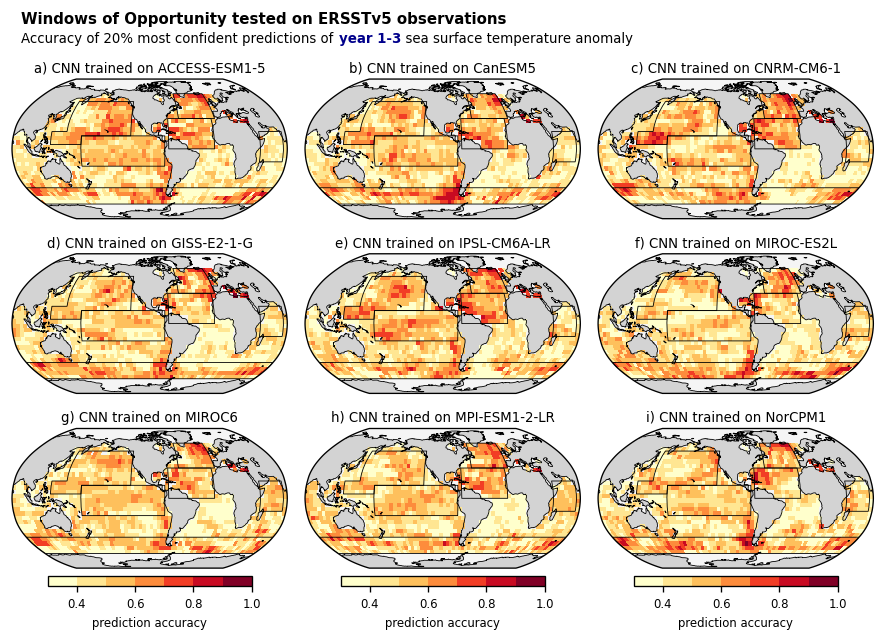

In [10]:
lead = 0
length = 36

fig = plt.figure(figsize = (7.4, 5.2))
label_count=0
for i, MODEL in enumerate(model_list):
    acc_ds = xr.open_dataset("../processed_data/accuracy/ERSSTv5_accuracy_top20_"+MODEL+\
                          "_"+str(length)+"mo_"+str(lead)+"lead.nc")
    ax = fig.add_axes([(i % 3)*.33 + .02, (2-(i // 3))*.28 + 0.06, 0.31, 0.3], projection = ccrs.Robinson(central_longitude = 260))
    ax.set_title(panel_labels[label_count]+"CNN trained on "+MODEL, y = 1.05, transform = ax.transAxes)
    label_count+=1
    
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
    figu.add_regions(ax)

    if i >=6: 
        cbaxes = fig.add_axes([(i % 3)*.33 + .06, 0.07, 0.23, 0.015]) 
        cbar = fig.colorbar(p, cax = cbaxes, label = 'prediction accuracy', orientation = "horizontal")
        cbar.ax.tick_params(labelsize=7)

plt.suptitle("Windows of Opportunity tested on ERSSTv5 observations", y = 0.99, x = 0.03, size = 9, ha = "left", weight = "bold")
ax.text(s = "Accuracy of 20% most confident predictions of                 sea surface temperature anomaly", x = 0.03, y = 0.94, 
             transform = fig.transFigure, size = 8)
ax.text(s = "year 1-3", y = 0.94, x = 0.388, color = "darkblue", weight = "bold",  
             transform = fig.transFigure, size = 8)

plt.savefig("../figures/Fig_S12_ERSSTv5_accuracy_year1-3.pdf")

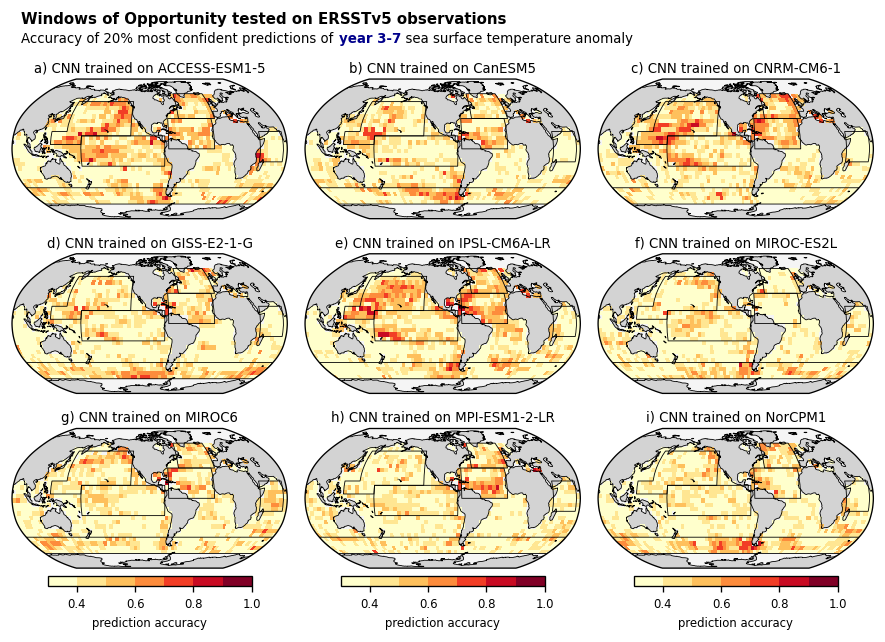

In [11]:
lead = 24
length = 60

fig = plt.figure(figsize = (7.4, 5.2))
label_count=0
for i, MODEL in enumerate(model_list):
    acc_ds = xr.open_dataset("../processed_data/accuracy/ERSSTv5_accuracy_top20_"+MODEL+\
                          "_"+str(length)+"mo_"+str(lead)+"lead.nc")
    ax = fig.add_axes([(i % 3)*.33 + .02, (2-(i // 3))*.28 + 0.06, 0.31, 0.3], projection = ccrs.Robinson(central_longitude = 260))
    ax.set_title(panel_labels[label_count]+"CNN trained on "+MODEL, y = 1.05, transform = ax.transAxes)
    label_count+=1
    
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
    figu.add_regions(ax)

    if i >=6: 
        cbaxes = fig.add_axes([(i % 3)*.33 + .06, 0.07, 0.23, 0.015]) 
        cbar = fig.colorbar(p, cax = cbaxes, label = 'prediction accuracy', orientation = "horizontal")
        cbar.ax.tick_params(labelsize=7)

plt.suptitle("Windows of Opportunity tested on ERSSTv5 observations", y = 0.99, x = 0.03, size = 9, ha = "left", weight = "bold")
ax.text(s = "Accuracy of 20% most confident predictions of                 sea surface temperature anomaly", x = 0.03, y = 0.94, 
             transform = fig.transFigure, size = 8)
ax.text(s = "year 3-7", y = 0.94, x = 0.388, color = "darkblue", weight = "bold",  
             transform = fig.transFigure, size = 8)

plt.savefig("../figures/Fig_S13_ERSSTv5_accuracy_year3-7.pdf")